# Star Wars <br>
While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?
<br>

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey.<br>

There are several columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.<br>


In [26]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

## Clean the Data

lets remove the rows where no id has been provided and clean the data to make our analysis easier 

In [27]:
#first look 
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [28]:
#this first row will come in handy later as it is noticeable different from the rest
first_row_info = star_wars.iloc[0,:]

In [29]:
#how many RespondantID's are null?
star_wars.loc[star_wars['RespondentID'].isnull(),:]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response


<b> Just one, this row corresponds to the 'first_row_info' and appears to be a kind of template row, since we've saved this row we can simply remove this from the dataframe

In [30]:
#The new dataframe with no null values for id's
star_wars = star_wars.loc[star_wars['RespondentID'].notnull(),:]

In [31]:
#Convert the 'yes'/'no' columns into true/False, doing  so will make future work easier 
col2 = 'Have you seen any of the 6 films in the Star Wars franchise?'
col3 = 'Do you consider yourself to be a fan of the Star Wars film franchise?'

counts_yes_no = star_wars[[col2,col3]].apply(pd.value_counts)
counts_yes_no

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
Yes,936,552
No,250,284


In [32]:
#replace columns with true and false
import numpy as np

mapping = {'Yes':True,
           'No':False,
           np.nan:False}
star_wars[col2] = star_wars[col2].map(mapping)
star_wars[col3] = star_wars[col3].map(mapping)


In [33]:
#make sure theyve been corrected
star_wars[col2].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [34]:
# the same for col3
star_wars[col3].value_counts(dropna=False)

False    634
True     552
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Renaming tickbox columns and filling with booleans

the columns 4 through to 9 represent check boxes for each of the 5 films, the column names are not clear as to which film they represent and the values within these columns are the names of the films if the respondent ticked the box and NAN otherwise(didnt want to answer or had not seen the film). <b> lets replace the column names and fill the columns with booleans

In [35]:
star_wars.head(1)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


In [36]:
#the check box columns we need to change
check_box_cols = star_wars.columns[3:9]

In [37]:
#method to count how many unqiue values are contained in each check box column
def check_box_col_val_count(col):
    return col.value_counts(dropna=False)

#the column entries and their count
check_box_counts = star_wars[check_box_cols].apply(check_box_col_val_count)
sums=check_box_counts.sum(axis=0)  
sums.name = 'total'
check_box_counts.append(sums)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
Star Wars: Episode I The Phantom Menace,673.0,NaN,NaN,NaN,NaN,NaN
NaN,513.0,615.0,636.0,579.0,428.0,448.0
Star Wars: Episode II Attack of the Clones,NaN,571.0,NaN,NaN,NaN,NaN
Star Wars: Episode III Revenge of the Sith,NaN,NaN,550.0,NaN,NaN,NaN
Star Wars: Episode IV A New Hope,NaN,NaN,NaN,607.0,NaN,NaN
Star Wars: Episode V The Empire Strikes Back,NaN,NaN,NaN,NaN,758.0,NaN
Star Wars: Episode VI Return of the Jedi,NaN,NaN,NaN,NaN,NaN,738.0
total,1186.0,1186.0,1186.0,1186.0,1186.0,1186.0


As we can see, each and every column representing wether each respondent has seen a given film within the series contains either the name of the film(they've seen it) OR NAN(they haven't seen it) and no other values <br>
<br>
Lets now make the data within the columns a little more intuitive by assigning <b>True</b> or <b> False </b> to the title name and NaN values respectively.<br>
We can make use of the fact that the very first respondent (the first row), has clearly seen <b> ALL </b> of the films and can extract the string from each column in said row to access the exact spelling/grammar used for the title.

In [38]:
import numpy as np

#insert true or false into checkbox columns 

for col in range(3,9):
    # name of the respective film is present in the first_row_info at position'col'
    
    #if name of film is present, respondant has seen the film, if not, they havent seen the film
    name = first_row_info[col]
    star_wars.iloc[:,col] = star_wars.iloc[:,col].map({name:True,
                       np.NaN:False})


In [39]:
# first column is 'Episode 1' 2nd column 'Episode 2' etc
# eg: seen1 is the column name representing wether the respondent has seen 'Episode 1'
for old_col, i in zip(check_box_cols, range(1,7)):
    star_wars = star_wars.rename(columns={old_col:'seen{}'.format(i)})

# reassign the new column names to check_box_cols
check_box_cols = star_wars.columns[3:9]

In [50]:
#make sure check box columns 3 up to 9 now contain boolean vals
def check_box_col_val_count_updated(col):
    return col.value_counts(dropna=False)

#the column entries and their count
check_box_counts_updated = star_wars[check_box_cols].apply(check_box_col_val_count_updated)
sums_up=check_box_counts_updated.sum(axis=0)  
sums_up.name = 'total'
check_box_counts_updated.append(sums)
check_box_counts_updated

,seen1,seen2,seen3,seen4,seen5,seen6
False,513,615,636,579,428,448
True,673,571,550,607,758,738


## Now for the other checkbox columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN

In [51]:
ranking_cols = star_wars.columns[9:15]
star_wars.iloc[:,9:15].head(1)

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6


In [52]:
#We should check that each column only contains the numbers 1-6 OR NaN
for col in range(9,15):
    print(star_wars.iloc[:,col].value_counts(dropna=False))
    print()

NaN    351
4      237
6      168
3      130
1      129
5      100
2       71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64

NaN    350
5      300
4      183
2      116
3      103
6      102
1       32
Name: Unnamed: 10, dtype: int64

NaN    351
6      217
5      203
4      182
3      150
2       47
1       36
Name: Unnamed: 11, dtype: int64

NaN    350
1      204
6      161
2      135
4      130
3      127
5       79
Name: Unnamed: 12, dtype: int64

NaN    350
1      289
2      235
5      118
3      106
4       47
6       41
Name: Unnamed: 13, dtype: int64

NaN    350
2      232
3      220
1      146
6      145
4       57
5       36
Name: Unnamed: 14, dtype: int64



<b> It's clear the columns do not contain any unexpected data. </b><br>
Time to convert the data from String to float, making calculations easier

In [53]:
#convert into float
star_wars[ranking_cols] = star_wars[ranking_cols].astype(float)

In [54]:
star_wars[ranking_cols].head(3)

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0


In [55]:
# to rename the columns we can use a similar tactic to renaming the 'seen' columns
for old_col, i in zip(ranking_cols, range(1,7)):
    star_wars = star_wars.rename(columns={old_col:'ranking{}'.format(i)})
#reasign ranking_cols to updated values
ranking_cols = star_wars.columns[9:15]



In [57]:
#check col names 
star_wars[ranking_cols].head()

,ranking1,ranking2,ranking3,ranking4,ranking5,ranking6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


# Visualizing the data 

In [58]:
%matplotlib inline

We can get a feel for the data by plotting a few graphs, Firstly lets examine which film was the most popular

In [59]:
#take the mean of the rankings columns
means = star_wars[ranking_cols].mean()

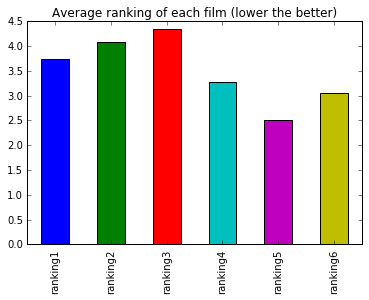

In [60]:
#plot the graph
means.plot(kind='bar', title='Average ranking of each film (lower the better)')

Since a lower score corresponds to a higher ranking, its clear 'Episode 5' is the favourite among this sample

<b> next let's examine the total views each film received  in our data </b>

In [61]:
# seen1, seen2 etc contain boolean values
# we can sum the columns using the fact that True = 1, False=0
total_views = star_wars[check_box_cols].sum(axis=0)

In [62]:
total_views

seen1    673
seen2    571
seen3    550
seen4    607
seen5    758
seen6    738
dtype: int64

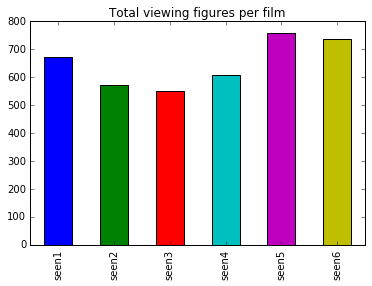

In [63]:
total_views.plot(kind='bar', title='Total viewing figures per film')

Episode 5 and 6 were watched the most. Which is indicative of the rankings they recieved

## Characters <br>

We will now see which characters from the franchise the audience is most fond of. <br>
The data for this is contained in columns 15 up to 29.
<br> each column represents a given character and the data in said column represents each Respondents feelings towards the character. It is a multiple choice type of response in which the Respondent can choose between 'very favourably' all the way down to 'very unfavourably', as will be seen below

In [65]:
#first lets make it clear that each column represents a different character
star_wars.columns[15:29]

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

In [66]:
# the name of the given character can be obtained once agan by the first_row_info series
char_cols = star_wars.columns[15:29]
for char_col in char_cols:
    character = first_row_info[char_col]
    star_wars = star_wars.rename(columns={char_col:character})
#reassign char_cols
char_cols = star_wars.columns[15:29]

In [67]:
#have the column names been changed?
star_wars.columns[15:29]


Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

In [74]:
#the responses
star_wars.iloc[:,15:29].apply(check_box_col_val_count)

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
Very favorably,610,552,547,245,591,110,310,142,138,474,562,112,168,605
NaN,357,355,355,363,361,372,360,366,374,359,356,365,372,360
Somewhat favorably,151,219,210,269,159,143,171,223,153,229,185,130,183,144
Neither favorably nor unfavorably (neutral),44,38,48,135,43,213,84,236,248,79,57,164,207,51
Unfamiliar (N/A),15,6,8,52,17,156,10,148,132,15,10,109,164,10
Somewhat unfavorably,8,13,12,83,8,68,102,63,96,23,10,102,58,8
Very unfavorably,1,3,6,39,7,124,149,8,45,7,6,204,34,8


<b> one striking thing is that there are numerous 'response types' representing the same 'feeling', all of the following represent  a neutral stance towards the character<br>
- Neither favorably nor unfavorably (neutral)
- Unfamiliar (N/A)
- NaN


In [72]:
# melt all the above into one 'type'..... neutral
for char_col in star_wars.columns[15:29]:
    star_wars[char_col] = star_wars[char_col].str.replace(r'(Unfamiliar (N/A))|(Neither favorably nor unfavorably (neutral))', 'neutral')

In [75]:
star_wars.iloc[:,15:29].apply(check_box_col_val_count)

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
Very favorably,610,552,547,245,591,110,310,142,138,474,562,112,168,605
NaN,357,355,355,363,361,372,360,366,374,359,356,365,372,360
Somewhat favorably,151,219,210,269,159,143,171,223,153,229,185,130,183,144
Neither favorably nor unfavorably (neutral),44,38,48,135,43,213,84,236,248,79,57,164,207,51
Unfamiliar (N/A),15,6,8,52,17,156,10,148,132,15,10,109,164,10
Somewhat unfavorably,8,13,12,83,8,68,102,63,96,23,10,102,58,8
Very unfavorably,1,3,6,39,7,124,149,8,45,7,6,204,34,8


These columns once again correspond to multiple choice selection. A respondent simply selects one of the choices representing their feelings towards the given Character in the series. The options being: <br>
very favorably, somewhat favorably, etc
<br>
What would be nice is if we could use these selections to decide which character is held in the highest and lowest regard by the respondents. <br>
To do this we can change the 'options' to a numeric value and then sum each column to see which character has the highest score


In [76]:
# replace with numeric values 0 being neutral, positive numbers
# for positive feelings, negative numbers for negative feelings
# a better way to merge the neutal stances I feel
mapping = {np.nan: 0, 
           'Neither favorably nor unfavorably (neutral)':0,
           'Unfamiliar (N/A)':0, 
           'Very favorably':2,
           'Somewhat favorably':1,
           'Very unfavorably':-2,
           'Somewhat unfavorably':-1
          }
for col in char_cols:
    star_wars[col] = star_wars[col].map(mapping)
    
star_wars.iloc[1:,15:29].apply(check_box_col_val_count)

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
-2,1,3,6,39,7,124,149,8,45,7,6,204,34,8
-1,8,13,12,83,8,68,102,63,96,23,10,102,58,8
0,416,399,411,550,421,741,454,749,753,453,423,638,743,421
1,151,219,210,269,159,143,171,223,153,229,185,130,183,144
2,609,551,546,244,590,109,309,142,138,473,561,111,167,604


<b> We can now sum the columns and see which character scores highest and lowest

In [77]:
likeability_score = star_wars[char_cols].sum(axis=0)

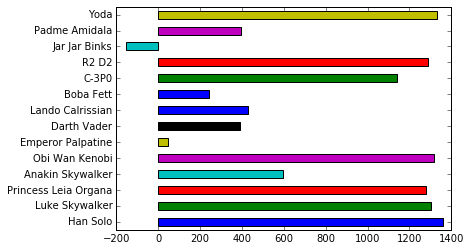

In [78]:
likeability_score.plot(kind='barh')

Not surprisingly, the 'goodies' rank higher than the 'baddies'. In our Data, Han Solo Ranks the highest and Jar Jar Binks ranks the lowest. Emperor Palpatine appears to be the most controversial Character with a score of almost 0 (indicating overall that just as many people like him as dislike him)

In [79]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen1', 'seen2', 'seen3', 'seen4', 'seen5', 'seen6', 'ranking1',
       'ranking2', 'ranking3', 'ranking4', 'ranking5', 'ranking6', 'Han Solo',
       'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker',
       'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader',
       'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks',
       'Padme Amidala', 'Yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

# Impact of education

Is there a correlation between the level one has reached or is currently at in education and both the likelyhood they would have seen a given film in the series and also wether they enjoy the Star Wars Franchise?

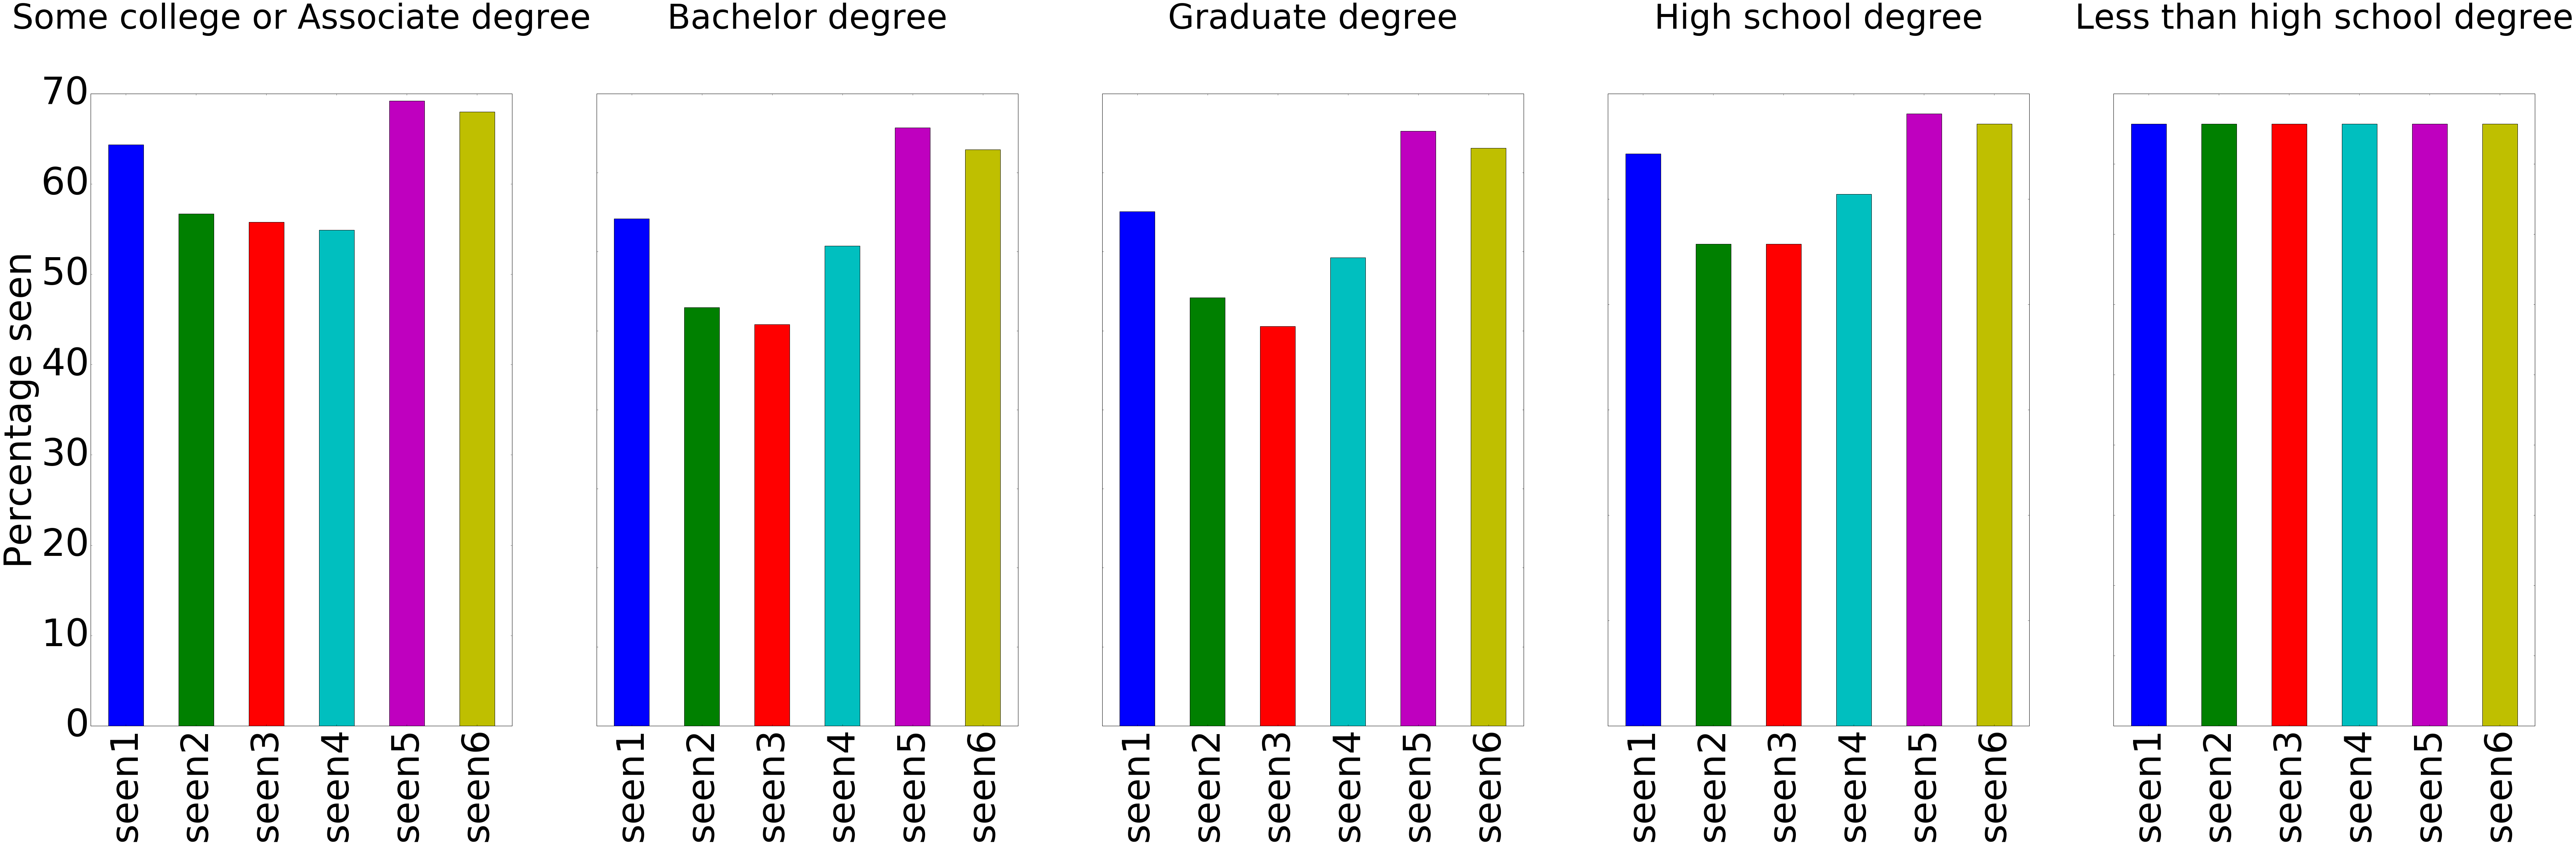

In [85]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(140,30))
#the percentages of each education level whom like Star Wars, to be used later
like_star_wars_percent = {}
#iterate through plots in figure
plot_num = 1
#the education levels
edu_levels = star_wars['Education'].value_counts().index
for edu_level in edu_levels:
    #Dict storing percentages of people with edu_level education whom have seen each film
    films = {}
    respondents_with_edu_level = star_wars.loc[star_wars['Education']==edu_level,:]
    total = respondents_with_edu_level.shape[0]
    #the percentage of edu_level educated people who LIKE/ENJOY Star Wars
    like_star_wars_percent[edu_level] = respondents_with_edu_level[col3].sum()/total
    #loop over 'seen' columns to find percentage of edu_level educated people whom have watched each film
    #store in 'films'
    for col in check_box_cols:
        total_seen = respondents_with_edu_level[col].sum(axis=0)
        percent_seen = total_seen/total * 100
        films[col] = percent_seen
    films = pd.Series(films)
    ax = fig.add_subplot(1,6, plot_num)
    ax = films.plot(kind='bar',sharey=True,)
    ax.set_title(edu_level, fontsize=90,y=1.1)
    ax.tick_params(labelsize=100)
    ax.set_ylabel('Percentage seen', fontsize=100)
    plot_num += 1


The graphs show no real difference. A person of any education level is almost just as likely to have seen a given film in series. It should be taken into consideration that the subgroup of 'less than high school degree' consisted of only 7 people.

In [81]:
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

Now let's see wether the level of education one has obtained effects the likelyhood that they will actually <b> enjoy the Franchise 

In [83]:
#those with bachelors degree
bachelors = star_wars.loc[star_wars['Education']=='Bachelor degree',:].copy()

In [84]:
#sum along 'im a star wars fan' column using the boolean true =1 ,false = 0
#find percentage of bachelor degree holding respondents whom like star wars
bachelors[col3].sum()/len(bachelors)

0.5358255451713395

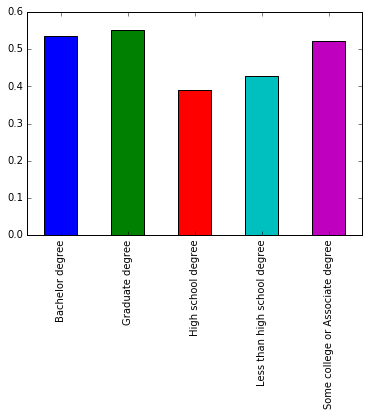

In [86]:
#using the dictonary made in the loop above, plot percentage of each education level whom ENJOY star wars
pd.Series(like_star_wars_percent).plot(kind='bar')

It does seem to appear that the more qualified a person is the more likely they would be to enjoy the franchise. This makes sense since the Sci-fi film genre is often associated with academically minded people 

# Conclusion

The purpose of this project was to provide me with more practice in cleaning the data so that it can be used for evaluation and then using my new found visualization skills to make sense of it.